# **Lab Exercise: Linear and Logistic Regression**

## **Linear Regression Construction** 

#### **Section 1: Setting Up and Importing Libraries**
*Objective:* Load the required `Python libraries`.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Section 2: Linear Regression Data Preparation**

*Objective:* Create a dataset for linear regression.

Task: Write the code to:

Create a dataset with features and target variables for linear regression.
Visualize the data using Matplotlib.


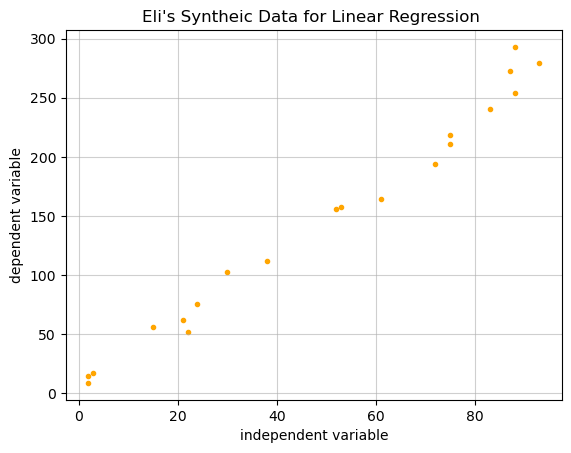

In [23]:
# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 100, 20)  # Features (independent variable)
y = 3 * X + 7 + np.random.normal(0, 15, 20)  # Target with noise

# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid

# Your code

%matplotlib inline
plt.xlabel('independent variable')
plt.ylabel('dependent variable')
plt.scatter(X,y,color='orange',marker='.')
plt.title('Eli\'s Syntheic Data for Linear Regression ')
plt.grid(alpha=0.6)
plt.show()

#### **Section 3: Implementing Linear Regression**

*Objective:* Practice linear regression construction.

Task: Write the code to:

Write a Linear Regression function to minimize the cost function and find the optimal parameters.


For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it.

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


In [29]:
# Your code for linear regression model

# Sklearn model
from sklearn import linear_model

# Prepare data
X_train = X
y_train = y

# Building the Model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

# Review Model parameter 
print("Linear Equation: y = ", reg.coef_, "* x +", reg.intercept_)



ValueError: Expected 2D array, got 1D array instead:
array=[52 93 15 72 61 21 83 87 75 75 88 24  3 22 53  2 88 30 38  2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Your code for linear regression model

# Manually write cost function & gradient descent 

# Reshape X to include a bias term (column of ones for the intercept) by np.column_stack
# your code

# Define the cost function for linear regression
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.
    """
    # your code 

    return cost
    
   

# Define the gradient descent function
def gradient_descent(X, y, alpha, iterations):
    """
    Perform gradient descent to minimize the cost function.
    """
    
    theta = np.zeros(2)  # Initialize theta (matching number of features)
    m = len(y)  # Number of training examples

    

    # Iterate to update theta with iterations
    # your code 
    

    return theta
    


# Number of iterations for gradient descent
iterations = 5000

# Learning rate for gradient descent
alpha = 0.0001

# Call the gradient descent function to compute optimized parameters
theta = # your code

# Compute the cost using the optimized parameters
cost = # your code

# Print the results
print("Optimized theta (parameters):", theta)  # Optimized values for theta (intercept and slope)
print("Final cost:", cost)  # Final cost value to evaluate the fit

### **Section 4: Visualizing the Linear Regression Line**

*Objective:* Plot the regression line with the original data.

Task: Plot the data points and the fitted regression line.

In [ ]:
# Compare predictions with actual values
y_pred = np.dot(X, theta)


# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 

## **Logistic Regression Construction** 

#### **Section 1: Logistic Regression Data Preparation**

*Objective:* Prepare data for logistic regression.

Task: Write the code to:

Create synthetic data for binary classification.
Visualize the data.

#### Dataset Description

Study_hour_Data.csv - The dataset simulates a scenario where students' chances of passing a course are influenced by their study habits and class participation. It contains 200 observations and the following three columns:


**Hours of Study:**
Integer values representing the number of hours a student spends studying in a week.
Range: 0 to 9.

**Class Participation:**
Float values between 0 and 1, representing the level of engagement in class activities.
Higher values indicate greater participation.

**Passed:**
Binary target variable indicating whether the student passed the course:
1: Passed.
0: Did not pass.
Determined based on a weighted combination of Hours of Study and Class Participation (with added noise), with a threshold value of 5.

In [ ]:
import pandas as pd
#read data from Pandas 

# Load dataset
# please use Study_hour_Data.csv as your target data
data = # your code

# Display basic information
print(data.info())
print(data.describe())

#Generate your training data X & y
X =  #use column Hours of Study
y =  #use columns Passed

#### **Section 2: Visualize the data**

In [ ]:
# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 



#### **Section 3: Implementing Logistic Regression**

*Objective:* Implement logistic regression.

For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it. 

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Then, use the scipy.optimize library to fit the logistic regression model.

In [ ]:
# Your code for logistic regression model

# Sklearn model
import 

# Prepare data

# Building the Model

# Review Model parameter 

In [ ]:
# Your logistic regression model

# Define the sigmoid function
def sigmoid(z):
    # pass
    
     

# Define the cost function for logistic regression
def cost_function(theta, X, y):
    # pass 
   

# Define the gradient function
def gradient(theta, X, y):
    #pass
    

In [ ]:
# Train your model
    
# Add a bias term (intercept) to X 
    
# Initialize theta (parameters) to zeros


# Minimize the cost function using scipy.optimize


# Print the optimized parameters (theta)
print("Optimized theta (parameters):", optimal_theta)

#### **Section 4: Evaluate the model**

*Objective:* Evaluate the model with the fitted data.

Task: build the Predict function, and Calculate accuracy.

In [ ]:
# Predict function
def predict(X, theta):
    # your code

# Make predictions
predictions = # your code

In [ ]:
# Calculate accuracy
accuracy = # your code 
print("Accuracy:", accuracy, "%")

### **Section 5: Visualizing Logistic Regression Fit**

*Objective:* Plot the logistic regression fit with the original data.

Task: Plot the sigmoid curve over the range of input features.

In [ ]:
# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title
